In [40]:
#2D isothermal cylindrical SS and just SMR
from scipy.integrate import solve_bvp, solve_ivp, odeint
import numpy as np
import matplotlib.pyplot as plt

[0.  0.5 1.  1.5 2. ]


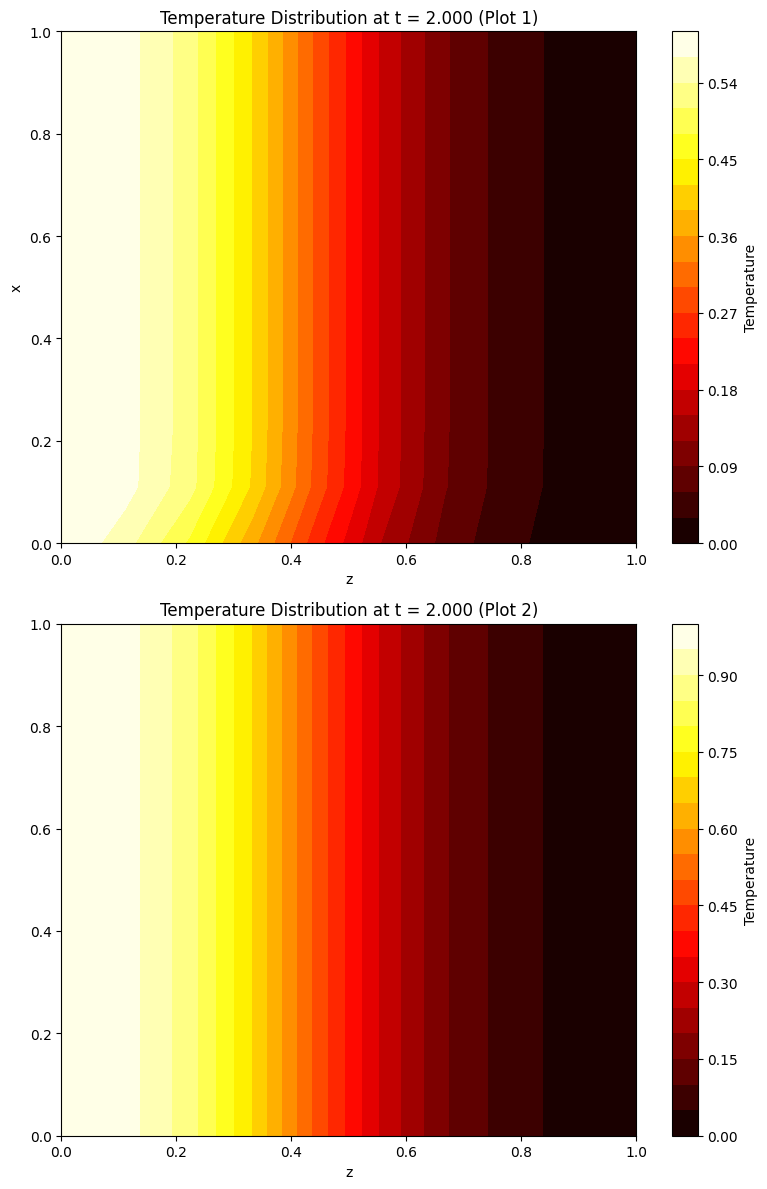

In [ ]:
num_z, num_x = 10, 10
L, R = 1.0, 1.0  # Dimensions of the 2D domain CAN ADD THE LENGTH AND RADIUS LATER
nz, nx = num_z, num_x+2   # Number of spatial grid points with 2 imaginary nodes
dz, dx = L / (nz - 1), R / (nx - 1)  # Spatial step sizes
z = np.linspace(0, L, nz)
x = np.linspace(0, R, nx)

D1 = D2 = 10**-3 #diffusion coefficient
v0 = 0.2 #velocity

u_init = np.zeros((6, len(x), len(z))).flatten() #THE NUMBER OF COMPONENTS

def pde(t,y):
    y = y.reshape((6, nx, nz)) #THE NUMBER OF COMPONENTS
    dydx2 = np.zeros_like(y)
    dydz = np.zeros_like(y)
    dydt = np.zeros_like(y)

    #MAYBE I NEED TO RESET THE BOUNDARY CONDITIONS IN HERE
    y[0,:,0] = 0.6 #component, x, z
    y[1,:,0] = 1

    


    #no flux boundary condition 
    y[:,-1,1:] = y[:,-3,1:] #makes it so that there is no flux on bottom boundary (imaginary point in y)
    
    
    #reaction boundary conditions.
    y[1,0,1:] = y[1,2,1:] #change the flux at this boundary to be the reaction later


    dydz[:,1:-1,1:] = (y[:,1:-1,1:] - y[:,1:-1,:-1])/dz
    dydx2[:,1:-1,:] = (y[:,2:, :] - 2 * y[:,1:-1, :] + y[:,:-2, :]) / dx**2

    #print(dydz)
    
    D = [D1, D2]  # List of diffusion coefficients
    for i in range(len(D)):
        dydt[i, 1:-1, :] = D[i] * dydx2[i, 1:-1, :] - v0 * dydz[i, 1:-1, :]

    return dydt.flatten()

t_final = 2
t_span = (0, t_final)  # Time interval
t_eval = np.linspace(0, t_final, 5)  # Ti   me evaluation points

sol = solve_ivp(pde, t_span, u_init, method='RK45', t_eval=t_eval)

x_plot = np.linspace(0, 1, num_x) 

u_plot = sol.y[:, -1].reshape((6, nx, nz)) #THE NUMBER OF COMPONENTS HERE IS 2

print(sol.t)

fig, ax = plt.subplots(2, 1, figsize=(8, 12))
ax[0].contourf(z, x_plot, u_plot[0, 1:-1, :], 20, cmap='hot')
ax[0].set_title(f'Temperature Distribution at t = {sol.t[-1]:.3f} (Plot 1)')
ax[0].set_xlabel('z')
ax[0].set_ylabel('x')
fig.colorbar(ax[0].contourf(z, x_plot, u_plot[0, 1:-1, :], 20, cmap='hot'), ax=ax[0], label='Temperature')
ax[1].contourf(z, x_plot, u_plot[1, 1:-1, :], 20, cmap='hot')
ax[1].set_title(f'Temperature Distribution at t = {sol.t[-1]:.3f} (Plot 2)')
ax[1].set_xlabel('z')
fig.colorbar(ax[1].contourf(z, x_plot, u_plot[1, 1:-1, :], 20, cmap='hot'), ax=ax[1], label='Temperature')
plt.tight_layout()
plt.show()